## Problem Statement
-----
The measurements of voltage drop and the current are taken to measure the resistance using multimeter. Following data are collected:

| Current (A) | Voltage (V) |
|-------------|-------------|
| 0.2         | 1.23        |
| 0.3         | 1.30        |
| 0.4         | 1.50|
| 0.5         |1.70|
| 0.6         | 2.2|

Fit a line assuming the measurement model $V = IR + V_0$ using the method of least squares to evaluate the resistance.

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Store the voltage and current data as column vectors.
I = np.array([[0.2, 0.3, 0.4, 0.5, 0.6]]).T
V = np.array([[1.23, 1.30, 1.5, 1.7, 2.2]]).T

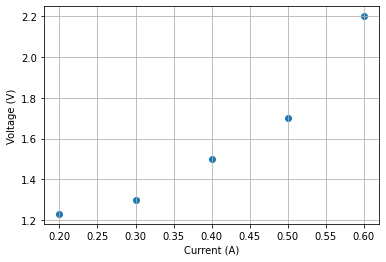

In [2]:
plt.scatter(I, V)
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()

Now, in this case we have to compute the two parameters, $\mathbf{R}$ and $\mathbf{b}$. So we have $m=4; n=2$, where $m$ is number of observations and $n$ is the number of parameters.  
It is also important to note that, the Jacobian matrix $\mathbf{H}$ is not equal to $\mathbf{I}$ but is of size $m × n$ and the elemts are given by the partial differentiation of measurement model with respect to the parameters.

$ \mathbf{H} = \begin{pmatrix}
\frac{\partial y_1}{\partial R} & \frac{\partial y_1}{\partial b} \\ 
\frac{\partial y_2}{\partial R} & \frac{\partial y_2}{\partial b} \\ 
\frac{\partial y_3}{\partial R} & \frac{\partial y_3}{\partial b} \\
\frac{\partial y_4}{\partial R} & \frac{\partial y_4}{\partial b} \\
\frac{\partial y_5}{\partial R} & \frac{\partial y_5}{\partial b} \\
\end{pmatrix}=
\begin{pmatrix}
I_1 & 1 \\ 
I_2 & 1 \\ 
I_3 & 1 \\ 
I_4 & 1 \\ 
I_5 & 1 \\ 
\end{pmatrix}$

## Least Square Formulation
----
From the Squared Error Criterion

\begin{align}
\hat{R} = \left(\mathbf{H}^T\mathbf{H}\right)^{-1}\mathbf{H}^T\mathbf{y}
\end{align}

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
[[0.2 1. ]
 [0.3 1. ]
 [0.4 1. ]
 [0.5 1. ]
 [0.6 1. ]]
The slope and offset parameters of the best-fit line (i.e., the resistance and offset) are [R, b]:
2.3400000000000003
0.6500000000000001


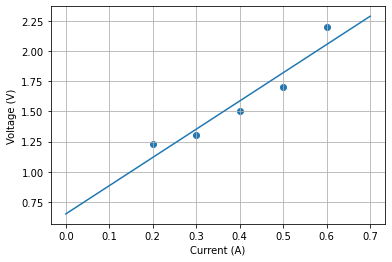

In [3]:
H = np.ones((5, 2))
print(H)
#Assign the values of the current in the first [index-0] column of the Jacobian matrix using the : operator
H[:, 0] = I.T
print(H)
x_ls = inv(H.T.dot(H)).dot(H.T).dot(V)
print('The slope and offset parameters of the best-fit line (i.e., the resistance and offset) are [R, b]:')
print(x_ls[0,0])
print(x_ls[1,0])

# Plot line.
I_line = np.arange(0, 0.8, 0.1).reshape(8, 1)
V_line = x_ls[0,0]*I_line + x_ls[1,0]

plt.scatter(I, V)
plt.plot(I_line, V_line)
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()